In [21]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import glob
import statistics

# ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [22]:
data = pd.read_csv('../datasets/cleaned_data.csv')
data.head()


,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Kid
0,Graduation,Single,58138.0,2012-09-04,58,635,88,546,172,88,...,7,0,0,0,0,0,0,1,66,0
1,Graduation,Single,46344.0,2014-03-08,38,11,1,6,2,1,...,5,0,0,0,0,0,0,0,69,2
2,Graduation,Together,71613.0,2013-08-21,26,426,49,127,111,21,...,4,0,0,0,0,0,0,0,58,0
3,Graduation,Together,26646.0,2014-02-10,26,11,4,20,10,3,...,6,0,0,0,0,0,0,0,39,1
4,PhD,Married,58293.0,2014-01-19,94,173,43,118,46,27,...,5,0,0,0,0,0,0,0,42,1


<Axes: xlabel='Age', ylabel='Count'>

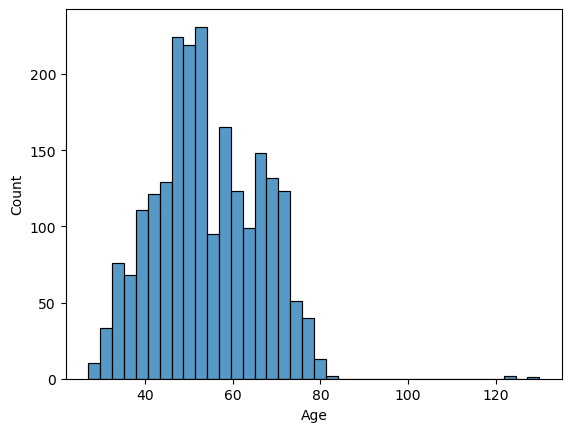

In [23]:
sns.histplot(data=data,x=data['Age'])


STAT DESCRIPTIVE 


In [24]:
# Informations statistiques sur les données catégorielles   
data[["Education", "Marital_Status"]].describe()

,Education,Marital_Status
count,2216,2216
unique,5,8
top,Graduation,Married
freq,1116,857


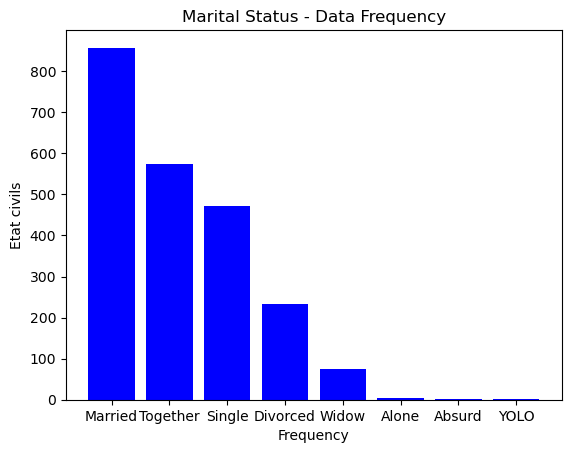

Nombre d’échantillons selon l’état civil 
Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


In [25]:
# Nombre d’échantillons selon l’état civil
plt.figure()
plt.bar(data["Marital_Status"].value_counts().index, data["Marital_Status"].value_counts(), color = "b")
plt.xlabel("Frequency")
plt.ylabel("Etat civils")
plt.title("Marital Status - Data Frequency")
plt.show()
print(f"Nombre d’échantillons selon l’état civil \n{data['Marital_Status'].value_counts()}")

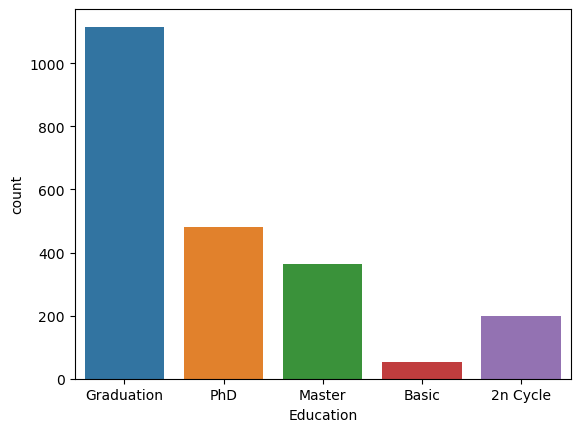

Nombre d’échantillons selon le niveau de scolarité 
Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


In [26]:
# Nombre d’échantillons selon le niveau de scolarité
sns.countplot(x="Education", data=data)
plt.xticks(rotation = 0)
plt.show()
print(f"Nombre d’échantillons selon le niveau de scolarité \n{data['Education'].value_counts()}")

In [28]:
# Tableau croisé dynamique pour voir l’état civil selon l’éducation
df = data[["Education", 'Marital_Status']].value_counts().reset_index(name="Nombre")
# df = (df.pivot(index='Education', columns='Marital_Status', values=0))
df

,Education,Marital_Status,Nombre
0,Graduation,Married,429
1,Graduation,Together,285
2,Graduation,Single,246
3,PhD,Married,190
4,Master,Married,138
5,Graduation,Divorced,119
6,PhD,Together,116
7,Master,Together,102
8,PhD,Single,96
9,2n Cycle,Married,80


In [29]:
df_pivot = df.pivot(index='Education', columns="Marital_Status", values="Nombre").fillna(0)
df_pivot

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,0.0,0.0,23.0,80.0,36.0,56.0,5.0,0.0
Basic,0.0,0.0,1.0,20.0,18.0,14.0,1.0,0.0
Graduation,1.0,1.0,119.0,429.0,246.0,285.0,35.0,0.0
Master,1.0,1.0,37.0,138.0,75.0,102.0,11.0,0.0
PhD,0.0,1.0,52.0,190.0,96.0,116.0,24.0,2.0
